In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import itertools
import cv2
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('GroundTruth.csv')
df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(10015, 8)

In [4]:
dfMEL = df[df["MEL"]==1]

In [5]:
dfMEL.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ISIC_0024313,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,ISIC_0024315,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17,ISIC_0024323,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27,ISIC_0024333,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dfMEL.drop(columns=["NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16984\3478252180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfMEL.drop(columns=["NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], inplace=True)


In [7]:
dfMEL.head()

,image,MEL
4,ISIC_0024310,1.0
7,ISIC_0024313,1.0
9,ISIC_0024315,1.0
17,ISIC_0024323,1.0
27,ISIC_0024333,1.0


In [8]:
dfNotMEL = df[df["MEL"]==0]

In [9]:
dfNotMEL.tail()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
10008,ISIC_0034314,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10009,ISIC_0034315,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10012,ISIC_0034318,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10013,ISIC_0034319,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10014,ISIC_0034320,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
dfNotMEL.drop(columns=["NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16984\2405651905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNotMEL.drop(columns=["NV", "BCC", "AKIEC", "BKL", "DF", "VASC"], inplace=True)


In [11]:
dfNotMEL.head()

,image,MEL
0,ISIC_0024306,0.0
1,ISIC_0024307,0.0
2,ISIC_0024308,0.0
3,ISIC_0024309,0.0
5,ISIC_0024311,0.0


In [12]:
dfNotMEL.shape

(8902, 2)

In [13]:
dfMEL.shape

(1113, 2)

In [14]:
dfNotMEL = dfNotMEL.sample(frac = 0.15, random_state = 40)

In [15]:
dfNotMEL.shape

(1335, 2)

In [16]:
df = pd.concat([dfMEL, dfNotMEL])

In [17]:
df.head()

,image,MEL
4,ISIC_0024310,1.0
7,ISIC_0024313,1.0
9,ISIC_0024315,1.0
17,ISIC_0024323,1.0
27,ISIC_0024333,1.0


In [18]:
df.shape

(2448, 2)

In [19]:
df = df.sample(frac=1, random_state=30)

In [20]:
df.head()

,image,MEL
9667,ISIC_0033973,0.0
3284,ISIC_0027590,1.0
4723,ISIC_0029029,0.0
3647,ISIC_0027953,0.0
2250,ISIC_0026556,0.0


In [21]:
imageArray = df["image"].to_numpy()

In [22]:
imageArray.shape

(2448,)

In [23]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden'

In [24]:
cd images

C:\Users\DELL\Desktop\imageiden\images


In [25]:
pwd

'C:\\Users\\DELL\\Desktop\\imageiden\\images'

In [26]:
Images = []

In [27]:
def processImage(image):
    image = cv2.resize(image, (150, 200))
    image = image.astype("float32") / 255
    return image

In [28]:
for img in imageArray:
    path = img + ".jpg"
    image = cv2.imread(path)
    image = processImage(image)
    Images.append(image)

In [29]:
len(Images)

2448

In [30]:
np.save("MELIMAGES.npy", Images)

In [31]:
output = df["MEL"].to_numpy()

In [32]:
len(output)

2448

In [33]:
output.shape

(2448,)

In [34]:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(Images), output, test_size = 0.2, random_state = 30)

In [35]:
xTrain.shape

(1958, 200, 150, 3)

In [36]:
yTrain.shape

(1958,)

In [37]:
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size = 0.2, random_state = 30)

In [38]:
xVal.shape

(392, 200, 150, 3)

In [39]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(200, 150, 3)))
model.add(Conv2D(32,kernel_size=(3, 3), activation='relu',padding = 'Same',))
model.add(MaxPool2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(Conv2D(64, (3, 3), activation='relu',padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 200, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 75, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 75, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 100, 75, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 100, 75, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 118400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    15,155,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,221,025 (58.06 MB)

 Trainable params: 15,221,025 (58.06 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Accuracy"])

In [41]:
history = model.fit(xTrain, yTrain, validation_data = (xVal, yVal), epochs = 10, batch_size = 32)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - Accuracy: 0.5388 - loss: 1.2245 - val_Accuracy: 0.5077 - val_loss: 0.6535
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 821ms/step - Accuracy: 0.5709 - loss: 0.6539 - val_Accuracy: 0.5281 - val_loss: 0.5986
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 846ms/step - Accuracy: 0.5758 - loss: 0.6009 - val_Accuracy: 0.7066 - val_loss: 0.6042
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 40s 825ms/step - Accuracy: 0.5915 - loss: 0.6136 - val_Accuracy: 0.6760 - val_loss: 0.5755
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 41s 843ms/step - Accuracy: 0.6356 - loss: 0.5992 - val_Accuracy: 0.7168 - val_loss: 0.5432
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 925ms/step - Accuracy: 0.6198 - loss: 0.5822 - val_Accuracy: 0.7143 - val_loss: 0.5398
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 45s 918ms/step - Accuracy: 0.6686 - loss: 0.5402 - val_Accuracy: 0.7168 - val_loss: 0.5161
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - Accuracy: 0.6433 - loss: 0.5531 - val_Accuracy: 

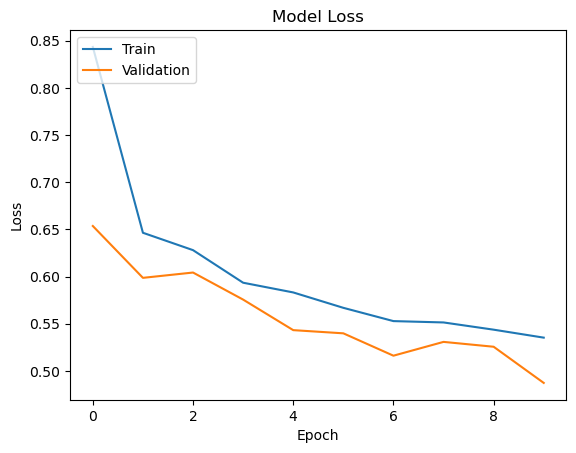

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
predictions = model.predict(xTest)

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step


In [43]:
preds = []

In [44]:
for p in predictions:
    if p>=0.5:
        preds.append(1)
    else:
        preds.append(0)

In [45]:
report = classification_report(yTest, preds, target_names = ["NOT MEL", "MEL"])

In [46]:
report = classification_report(yTest, preds, target_names = ["NOT VASC", "VASC"])

In [47]:
print(report)

              precision    recall  f1-score   support

    NOT VASC       0.73      0.71      0.72       246
        VASC       0.72      0.74      0.73       244

    accuracy                           0.72       490
   macro avg       0.72      0.72      0.72       490
weighted avg       0.72      0.72      0.72       490

